#**Pasado por Leonardo**

# Create the tree

tree = DecisionTreeClassifier(max_depth=6, class_weight='balanced')

tree.fit(X_train,y_train)



#create array of probabilities

y_test_predict_proba = tree1.predict_proba(X_test)



# calc confusion matrix

y_test_predict = tree.predict(X_test[columns])

print("Confusion Matrix Tree : \n", confusion_matrix(y_test, y_test_predict),"\n")

print("The precision for Tree is ",precision_score(y_test, y_test_predict)) 

print("The recall for Tree is ",recall_score(y_test, y_test_predict),"\n")  

https://www.projectpro.io/recipes/generate-classification-report-and-confusion-matrix-in-python

# ⚡ Grupo 6 - UTEC 4Geeks BID 2022 ⚡
# PROYECTO FINAL

# Stroke Prediction 

Stroke happens when the blood supply to part of the brain is cut off. Without blood, brain cells can be damaged or die. Fast access to treatment saves lives and improves recovery.

There are many factors, including tobacco use, physical inactivity, unhealthy diet, harmful use of alcohol, atrial fibrillation, raised blood lipid levels, obesity, genetic disposition, stress and depression.

Stroke has already reached epidemic proportions. 1 in 4 of us will have a stroke in our lifetime. 

Ref: https://www.world-stroke.org/

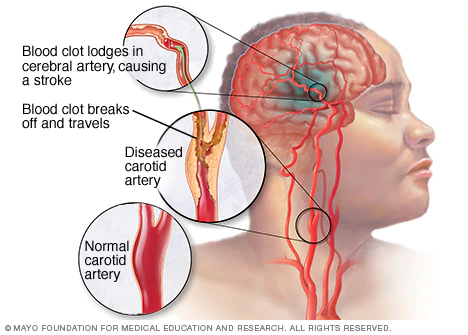

In Uruguay, stroke has a fundamental epidemiological importance: it is among the three leading causes of death at a general level and it is the leading cause of disability in adults. According to data published by the Commission for Cardiovascular Health, around 80 million people living in the world today have suffered a stroke and, consequently, more than 50 million survivors live with some type of permanent disability. Although life after a stroke is not the same in many cases, it is possible, with the right care and support, to continue with a good quality of life. CVAs are time-dependent, which means that it is essential to identify them as quickly as possible in order to establish the most appropriate treatment for the patient and prevent possible sequelae; they constitute one of the leading causes of disease burden worldwide and in Uruguay, measured in years of healthy life lost, an indicator that encompasses both mortality and disability caused by these diseases.

According to the latest data from the Ministry of Public Health, from December 2019, during 2018, 1,732 people died from stroke and 2,125 people from cerebrovascular causes in general. (https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo)


80% of the risk of suffering a stroke is preventable by modifying our behaviors. Traditional cerebrovascular risk factors can be controlled through a healthy eating pattern, avoiding overweight and obesity, through physical exercise, avoiding tobacco, alcohol, high cholesterol, with the control of arterial hypertension and diabetes. All these factors are decisive in the formation of obstructive plaques (atheromas) that form on the walls of the arteries.


For this reason, our model it's about screen healthy patients to know the degree of probability of suffering a stroke or not suffering it to work on a personalized prevention plan.




### Metadata
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

The information was downloaded from the Kaggle site.
 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset because we did not find Uruguayan public data about stroke.

**Studying the data dictionary our first conclusions is:
Contains some of the preconditions recognized worldwide as causes of the disease.**





In [1]:
!pip install --upgrade pip
!pip install pandas numpy seaborn plotly
!pip install sklearn
!pip install statsmodels
!pip install imblearn

# Import Library and modules


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from imblearn.under_sampling import NearMiss
from collections import Counter

# Load the dataset




In [76]:
df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

# Explore Data

*Get basic info*

In [77]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Observations: 

This dataset have 
- 12 columns whit 5110 observations.
- Missing value in bmi.
- Diferents types of date 

In [78]:
# Take a sample
df_raw.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4429,7871,Female,40.0,0,0,Yes,Private,Urban,86.78,35.5,smokes,0
4447,41942,Female,37.0,0,0,Yes,Private,Urban,247.87,42.6,never smoked,0
867,63058,Female,77.0,0,1,Yes,Private,Rural,183.10,NaN,never smoked,0
5031,67465,Female,20.0,0,0,No,Private,Rural,117.59,17.1,never smoked,0
2744,46699,Female,18.0,0,0,No,Private,Rural,78.57,34.4,Unknown,0


 **Stroke** See amount of value of our target 



In [79]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

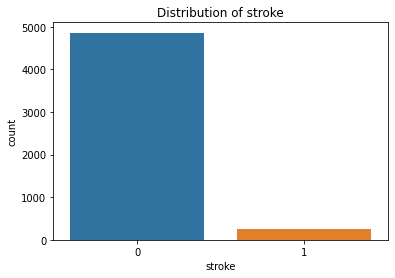

In [80]:
sns.countplot(x=df_raw['stroke'])
plt.title('Distribution of stroke')
plt.show()

**Note: We  have a desbalanced dataset**

An obvious case is in the Health area where we usually find data sets with thousands of records with “negative” patients and a few positive cases, that is, those who suffer from the disease we want to classify.

If we measure the effectiveness of our model by the number of hits it had, only taking into account the majority class we may be having a false feeling that the model works well.
We have four possible cases for each class:

- High precision and high recall: the model perfectly handles that class
- High precision and low recall: the model does not detect the class very well, but when it does, it is highly reliable.
- Low precision and high recall: The class detects the class well but also includes samples from other classes.
- Low precision and low recall: The model fails to classify the class correctly.

When we have a dataset with imbalance, it usually happens that we obtain a high precision value in the Majority class and a low recall in the Minority class.




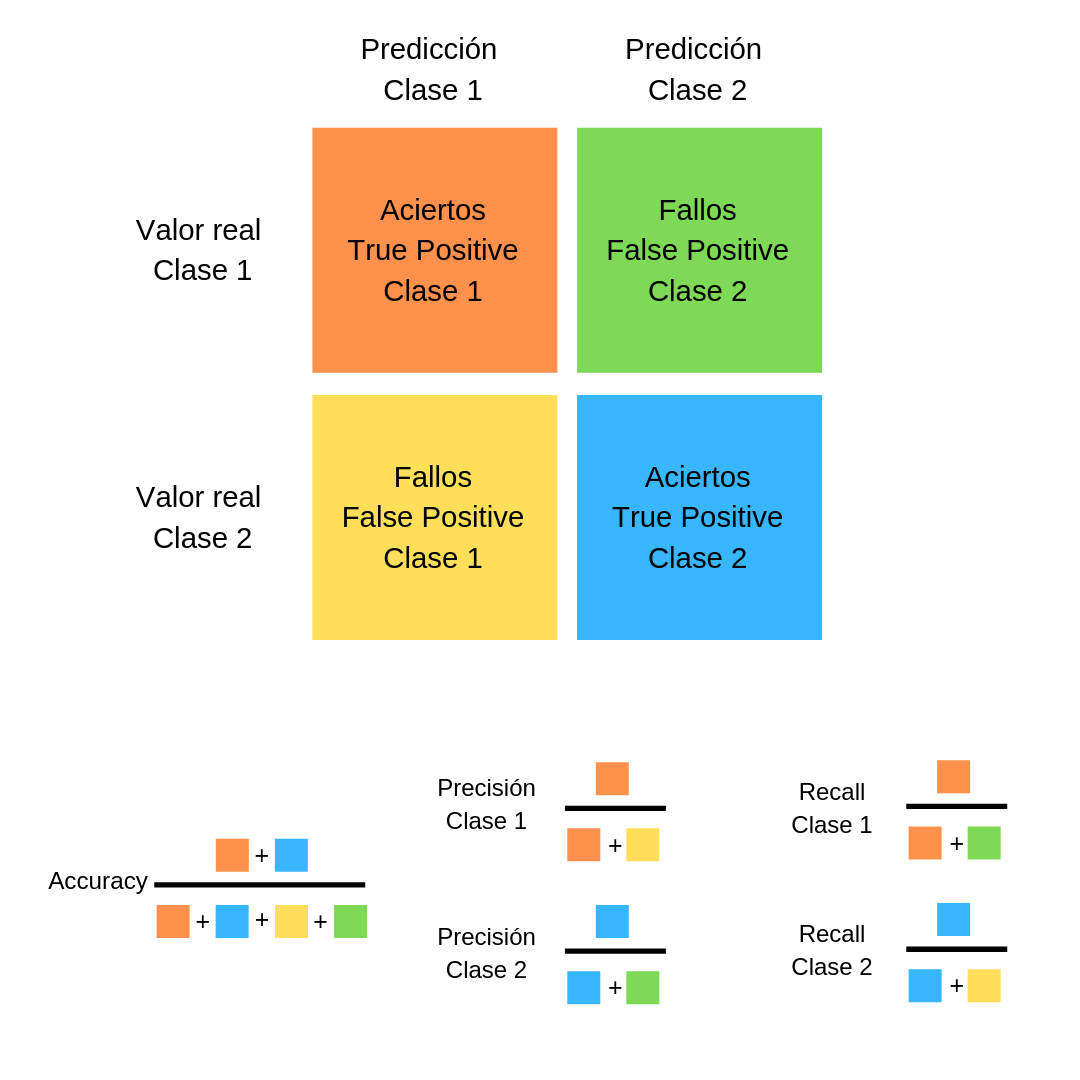

***There are several strategies for working with unbalanced datasets that we will discuss later.***

*Let continuing to study the variables*

**Gender**

In [87]:
df_raw['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

***Residence_Type***  

1.   Urban
2.   Rural



In [81]:
df_raw['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

***Ever_married***

*   Yes
*   No



In [82]:
df_raw['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

***Work_Type***

*   Private
*   Govt_job
*   Self-employed
*   children
*   Never_worked







In [83]:
df_raw['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

***smoking_status***
 * never_smoked
 * fromerly smoked
 * smokes
 * Unknown


    "formerly smoked": An adult who has smoked in his or her lifetime but who had quit smoking at the time of interview.
    "Unknown": not have data about this patients


In [84]:
df_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

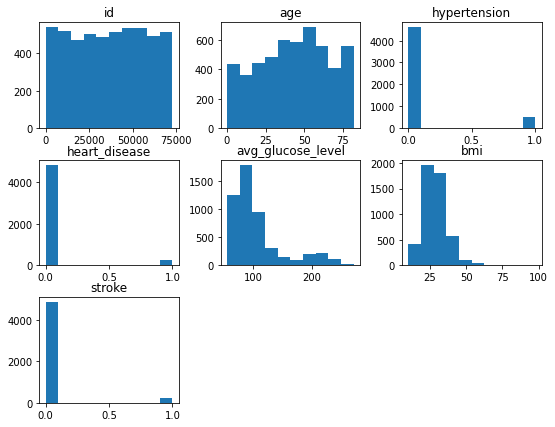

In [85]:
df_raw.hist(bins=10,figsize=(9,7),grid=False);
plt.show()

***We look for information about some variables to study our dataset***

***hypertension***

Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries, the major blood vessels in the body. Hypertension is when blood pressure is too high.




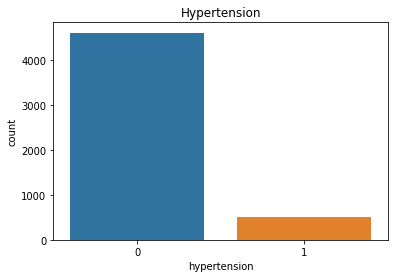

In [86]:
sns.countplot(x=df_raw['hypertension'])   #,hue=df_raw['stroke']
plt.title('Hypertension')
plt.show()

***avg_glocose_level***
Glycemia is the concentration of glucose or sugar in the blood, coming from food, especially carbohydrates. "average glucose" is a way of translating A1C test results into terms that closely represent daily glucose readings. It was introduced by the American Diabetes Association (ADA) in 2010 to help people with diabetes better understand how their A1C results compare to their daily glucose readings.

The eAG is determined using a straightforward mathematical formula that converts percentage of glycated hemoglobin as determined by an A1C test into the unit you're used to seeing on your glucometer: mg/dL: 28.7 X A1C – 46.7 = eAG.

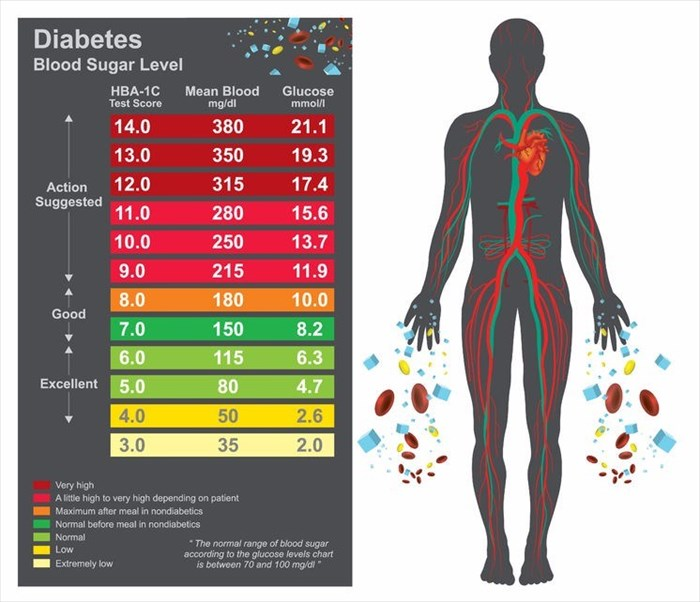

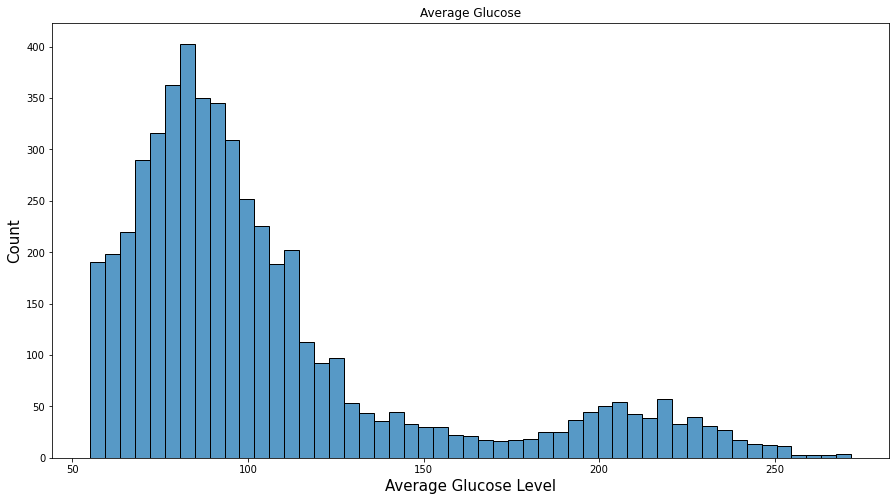

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_raw, x="avg_glucose_level")  #, hue="stroke"
plt.xlabel("Average Glucose Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Average Glucose')
plt.show()

***BMI:***

Body mass index (BMI) is a person's ***weight in kilograms*** divided by the ***square of height in meters***. BMI is an easy and inexpensive screening method for weight category: underweight, healthy weight, overweight, and obesity.
The bmi is a parameter that is widely used to assess the nutritional status of a person, since it correlates 80% with body fat and, together with other anthropometric measurements, can bring us closer to the diagnosis of overweight or obesity.

It is known that in adults the normal or healthy BMI is between 18 and 25, however, these normal values ​​can vary over the years. Therefore, below we present a table where the normality of the BMI according to age is presented.

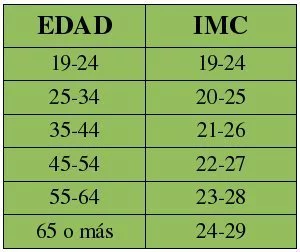


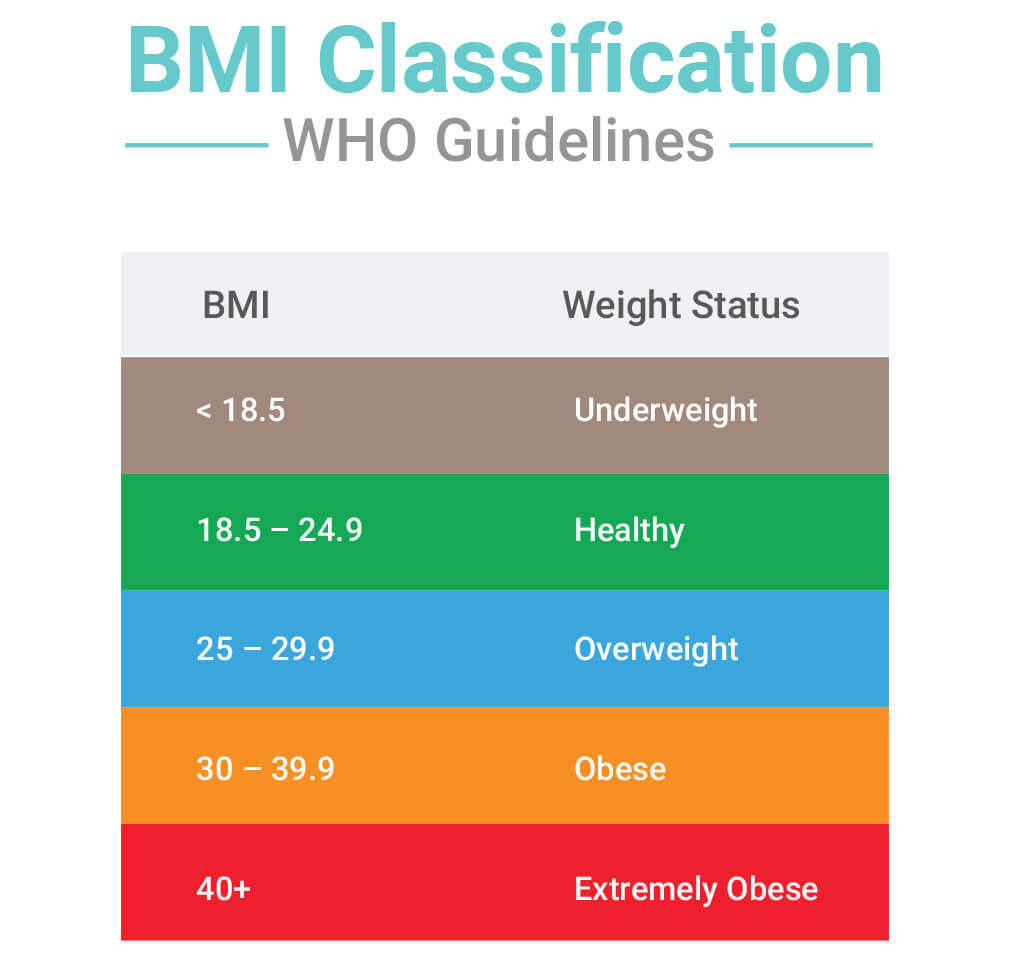

In [ ]:
df_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000,3676.000000,3832.000000
mean,36592.102818,43.277015,0.098904,0.052453,106.709139,28.825326,0.048800
std,21165.869131,22.661914,0.298572,0.222968,46.038703,7.929740,0.215477
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18017.750000,25.000000,0.000000,0.000000,77.327500,23.500000,0.000000
50%,36964.500000,45.000000,0.000000,0.000000,91.850000,27.800000,0.000000
75%,54575.250000,61.000000,0.000000,0.000000,114.635000,33.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We must study the age distribution. We have read that most studies are carried out on populations > 35 years.

Most patients do not have deviations in Hypertensión and heart_disease. 
75% Glucose values ​​on average are within the normal range, however we have high maximum values (271 mg/dl). 
Regarding bmi values, we can conclude that we have a mostly obese population, which could lead us to biased information.

We will have to study the extreme values ​​of this variables.





## Studie duplicates

In [ ]:
df_duplicates = df_raw['id'].duplicated().sum()
df_duplicates

0

Theres is not duplicated observation

## Partition of DataSet

After study the dataset, see that the stroke observation was after 35 years.

In [5]:
df_filter_age35 = df_raw[df_raw['age']>35]
df_filter_age35['stroke'].value_counts()

0    2965
1     246
Name: stroke, dtype: int64

**The dataset have only 2 observation of stroke, but have 1371 case of no-stroke. The dataset not have enought information of stroke for young people below 35**

In [ ]:
df_filter_agebelow35 = df_raw[df_raw['age']<35]
df_filter_agebelow35['stroke'].value_counts()

0    1371
1       2
Name: stroke, dtype: int64

# We have read that most studies are carried out on populations > 35 years, so we resolved remove all observation below 35 years-old.


In [6]:
df_raw = df_filter_age35.copy()

In [ ]:
df_raw['stroke'].value_counts()

0    2232
1     185
Name: stroke, dtype: int64

# Studie of the missing values of BMI



In [ ]:
# Showing records where patient had missing value in bmi attribute.
df_raw[df_raw['bmi'].isna()].shape

(115, 12)

In [ ]:
# Showing records where patient suffered from stroke but had missing value in bmi attribute.
df_raw[df_raw['bmi'].isna() & df_raw['stroke'] == 1].shape


(29, 12)

115 records were listed as NaN (not a number) in the BMI column. The first thought was to remove them since they represented a small fraction of the dataset. Nevertheless, by probing further, it contained 40 records where patients suffered a stroke. This information was valuable considering the fact that only 185 patients suffered a stroke in this dataset.


In [ ]:
#df_raw['bmi'].fillna(np.round(df_raw['bmi'].mean(), 1), inplace = True)
#change bmi null by mean of all bmi value

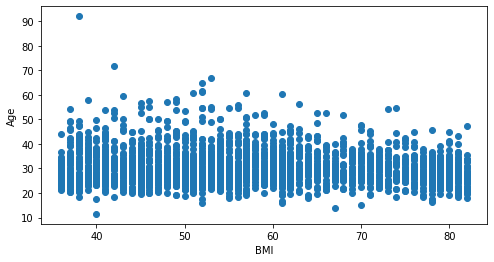

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(y=df_raw['bmi'], x=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

In [ ]:
df_raw[df_raw['bmi']<25].shape

(421, 12)

In [ ]:
df_raw[df_raw['bmi']>=25].shape

(1881, 12)

In [ ]:
df_raw[df_raw['bmi']>=30].shape

(1110, 12)

**Resume Preview of BMI dataset:**
- 115 missing value
- 421 observation of normal weight
- 1881  observation of over weight inside this 1110 extreme obesity


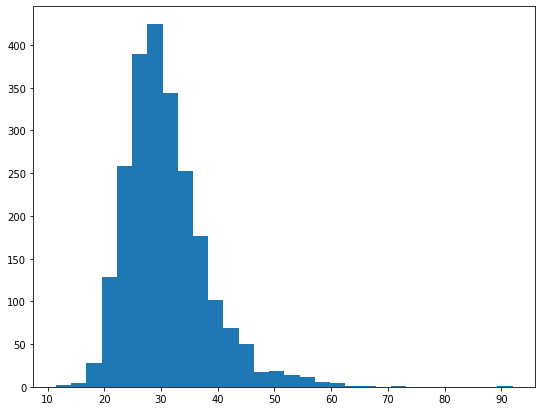

In [ ]:
df_raw['bmi'].hist(bins=30,figsize=(9,7),grid=False);
plt.show()

## Studie of missing BMI

Missing values ​​are present in most of the data sets we work with in our day to day. They are those in which no data value is stored in an observation. It is of vital importance to identify and deal with, for example, by imputation, these values ​​in order to continue with our analysis or training of the machine learning model.


Given the observations we have, we know that it is not feasible to output the observations with MBI null. That is why we must define what technique to use to complete those values.

1- The first technique consists of filling these values ​​with the mean (or median) of the data of the variable in the case that it is a numerical variable. For the case of categorical variables, we impute the missing values ​​with the mode of the variable.

2- Another more advanced technique consists of the use of predictive models to estimate missing values. A very popular non-parametric model for these cases is the k-nearest neighbors model, where the missing value is estimated as the mean (in the case of numerical variables) of the values ​​of the k closest neighbors or observations. Likewise, for categorical variables, the majority class of the closest k is used (KNN).
La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses.

3-  Decision Tree to predict the missing BMI




We read that bmi is related to age. According to the graph found, we observe that the intervals are 5 years.
We define bins of 5 years starting at 35. 
Le asignamos a los valores null de bmi la media del bins al que corresponde la observación.
Mostramos el paso a paso.

In [7]:
# Same labels as yours
labels = ['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +']

# Define the edges between bins
bins = [35, 45, 55, 65, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
df_raw
 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65 - +
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,55 - 64.9
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,65 - +
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,45 - 54.9
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,65 - +
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0,55 - 64.9
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,65 - +
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,65 - +
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,45 - 54.9


In [8]:
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw[df_raw['bmi'].isna()].sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_new
133,31563,Female,38.0,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1,35 - 44.9,31.476136
1753,5511,Male,66.0,0,0,Yes,Self-employed,Urban,71.38,NaN,formerly smoked,0,65 - +,29.557083
70,70676,Female,76.0,0,0,Yes,Govt_job,Rural,62.57,NaN,formerly smoked,1,65 - +,29.557083
1306,1678,Female,54.0,1,0,Yes,Private,Rural,98.74,NaN,never smoked,0,45 - 54.9,31.760649
3028,13111,Female,67.0,1,0,Yes,Private,Rural,85.48,NaN,smokes,0,65 - +,29.557083
1646,31461,Female,48.0,0,1,Yes,Self-employed,Urban,101.22,NaN,formerly smoked,0,45 - 54.9,31.760649
3216,6852,Female,52.0,1,0,Yes,Self-employed,Rural,104.45,NaN,never smoked,0,45 - 54.9,31.760649
2855,65196,Male,75.0,1,0,Yes,Private,Rural,198.79,NaN,smokes,0,65 - +,29.557083
170,28939,Male,64.0,0,0,Yes,Self-employed,Rural,111.98,NaN,formerly smoked,1,55 - 64.9,31.343135
2515,54807,Male,62.0,1,1,Yes,Private,Rural,176.25,NaN,never smoked,0,55 - 64.9,31.343135


In [ ]:
df_raw.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_new
4511,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0,65 - +,17.9
1126,66362,Female,61.0,0,0,Yes,Private,Urban,129.31,41.2,Unknown,0,55 - 64.9,41.2
579,8328,Female,54.0,0,0,Yes,Private,Rural,118.51,40.6,never smoked,0,45 - 54.9,40.6
3186,8819,Female,68.0,0,0,Yes,Govt_job,Rural,215.33,27.0,formerly smoked,0,65 - +,27.0
1330,40624,Female,37.0,0,0,Yes,Private,Rural,156.70,36.9,never smoked,0,35 - 44.9,36.9
2675,15313,Female,69.0,1,0,Yes,Govt_job,Urban,208.20,32.6,formerly smoked,0,65 - +,32.6
761,4169,Female,37.0,0,0,No,Private,Rural,92.78,54.2,never smoked,0,35 - 44.9,54.2
4905,49925,Female,60.0,0,0,Yes,Private,Rural,84.54,23.4,smokes,0,55 - 64.9,23.4
914,71591,Female,58.0,0,0,Yes,Private,Urban,89.03,30.0,smokes,0,55 - 64.9,30.0
3710,12674,Male,44.0,0,0,Yes,Private,Rural,74.15,34.5,formerly smoked,0,35 - 44.9,34.5


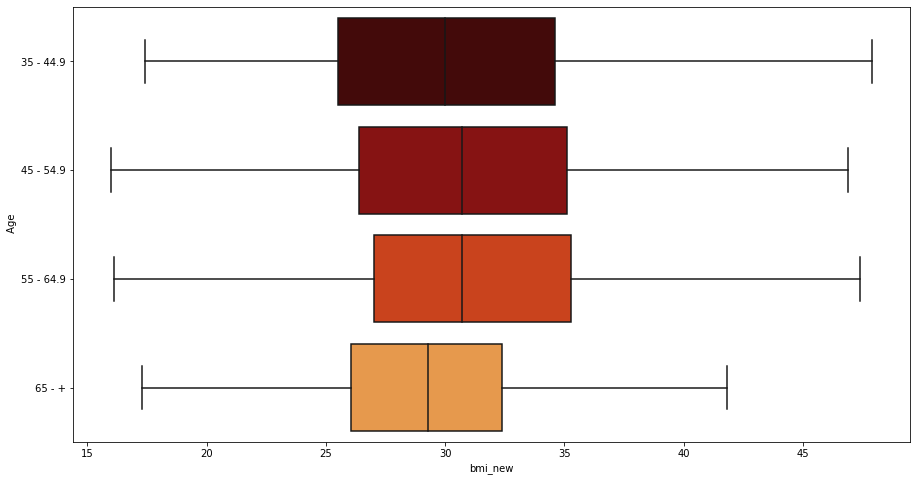

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Age') 
plt.show()

Con esta gráfica observamos que el comportamiento de los rangos de edades/bmi es igual al gráfico que mencionamos al principio de esta tarea.

* Change bmi null by mean of all bmi value

In [9]:
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)


## Transform if needed

In this dataset, there are 3 numerical attributes, i.e. age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier. Noted that new columns were created rather than replacing the initial columns. This preserved the original data.

In [ ]:
df_raw.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_new
2978,2218,Male,42.0,0,0,Yes,Private,Rural,107.83,35.300000,smokes,0,35 - 44.9,35.300000
1550,25935,Female,50.0,0,0,No,Self-employed,Urban,77.67,34.500000,Unknown,0,45 - 54.9,34.500000
4451,6472,Female,78.0,0,0,Yes,Govt_job,Urban,101.76,29.557083,smokes,0,65 - +,29.557083
3244,15803,Female,45.0,0,0,Yes,Private,Rural,73.87,25.600000,Unknown,0,45 - 54.9,25.600000
2428,6480,Male,62.0,0,0,No,Govt_job,Urban,93.55,31.700000,never smoked,0,55 - 64.9,31.700000
4571,37192,Female,40.0,0,0,Yes,Private,Urban,72.99,46.400000,Unknown,0,35 - 44.9,46.400000
2865,51963,Male,58.0,0,0,Yes,Private,Urban,69.24,27.600000,never smoked,0,55 - 64.9,27.600000
3914,15098,Female,65.0,0,0,Yes,Private,Rural,95.87,29.800000,never smoked,0,65 - +,29.800000
1500,45257,Female,38.0,0,0,Yes,Private,Rural,81.28,33.200000,smokes,0,35 - 44.9,33.200000
204,62019,Male,54.0,0,0,Yes,Govt_job,Rural,87.85,31.100000,smokes,1,45 - 54.9,31.100000


In [10]:
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_raw['gender'].astype(int)

# Encoding the 'Residence_type' column
df_raw['Residence_type'] = df_raw['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# Encoding the 'Residence_type' column
df_raw['ever_married'] = df_raw['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
 
# Encoding the 'Embarked' column
df_raw['work_type'] = df_raw['work_type'].map({'Private' : 0, 'Self-employed': 1, 'children': 2 , 'Govt_job':3, 'Never_worked':4})


In [ ]:
df_raw.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_new
1741,41007,0,39,0,0,1,0,1,60.60,34.200000,never smoked,0,35 - 44.9,34.200000
2057,1499,0,43,0,0,1,3,0,72.13,42.600000,never smoked,0,35 - 44.9,42.600000
2351,26993,0,41,0,0,1,0,0,89.88,33.100000,formerly smoked,0,35 - 44.9,33.100000
3534,53897,0,61,0,0,1,0,1,108.18,19.100000,never smoked,0,55 - 64.9,19.100000
1567,58015,0,44,0,0,0,0,0,65.30,22.100000,smokes,0,35 - 44.9,22.100000
1335,28904,0,75,0,0,1,1,0,74.79,32.400000,never smoked,0,65 - +,32.400000
1347,15757,1,71,0,0,1,0,1,85.33,27.700000,never smoked,0,65 - +,27.700000
4473,58313,0,63,0,0,1,1,1,60.67,28.900000,formerly smoked,0,55 - 64.9,28.900000
62,65842,0,67,1,0,1,1,0,61.94,25.300000,smokes,1,65 - +,25.300000
3808,10055,0,37,0,0,0,3,0,72.08,31.476136,formerly smoked,0,35 - 44.9,31.476136


## smoking_status 

In [11]:
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})

In [12]:
df_raw.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins,bmi_new
2633,72819,0,82,0,0,1,1,1,243.59,24.300000,1,0,65 - +,24.300000
2069,29388,0,66,0,0,1,0,1,202.05,31.700000,2,0,65 - +,31.700000
500,34668,0,56,0,0,1,0,1,77.49,36.000000,3,0,55 - 64.9,36.000000
731,30712,1,50,0,0,1,0,1,103.51,35.900000,1,0,45 - 54.9,35.900000
411,27213,1,64,1,0,1,1,0,178.29,36.100000,1,0,55 - 64.9,36.100000
744,16685,0,71,1,0,1,0,1,194.62,31.600000,1,0,65 - +,31.600000
3724,64189,1,61,0,0,1,1,0,152.84,28.600000,0,0,55 - 64.9,28.600000
5081,37680,1,55,0,0,1,3,0,108.35,40.800000,3,0,55 - 64.9,40.800000
2524,47861,1,81,0,0,1,0,1,165.47,28.100000,0,0,65 - +,28.100000
1052,10752,0,61,0,0,1,0,0,78.65,36.200000,3,0,55 - 64.9,36.200000


Remove columns age_bins 

In [13]:
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)

In [14]:
df_raw.sample(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2932,0,37,0,0,1,0,1,60.05,24.100000,0,0
403,0,52,0,0,1,3,1,80.88,23.800000,2,0
18,0,60,0,0,0,0,1,89.22,37.800000,1,1
3136,1,36,0,0,1,0,0,161.00,29.000000,2,0
4701,1,50,0,0,1,0,1,120.44,30.300000,1,0
4601,1,36,0,0,1,0,0,106.73,25.100000,1,0
3090,0,50,0,0,1,3,0,120.05,27.400000,0,0
2731,0,53,0,0,1,0,1,73.60,27.000000,1,0
3421,0,51,0,0,1,3,0,85.59,30.500000,1,0
4312,1,39,1,0,1,0,0,111.24,38.800000,1,0


## Countplot for categorical variables

We ask ourselves some questions and these are all questions that can be explored and answered with some data visulization.

Does age makes one more likely to suffer a stroke? 

What about gender? 

BMI?


In [15]:
variables = [variable for variable in df_raw.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

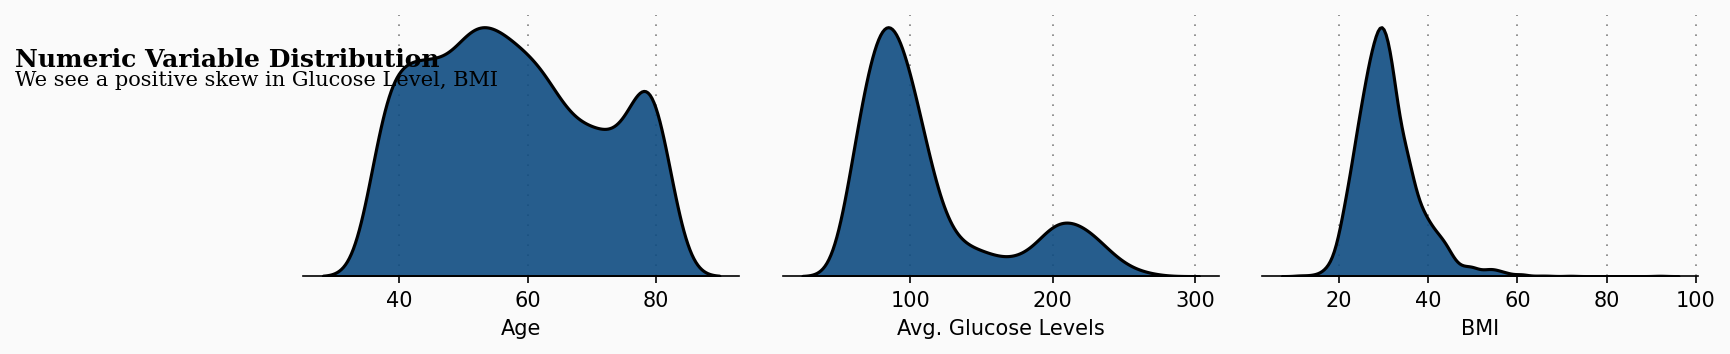

In [17]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df_raw[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=12, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in Glucose Level, BMI', fontsize=10, fontweight='light', fontfamily='serif')

plt.show()

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

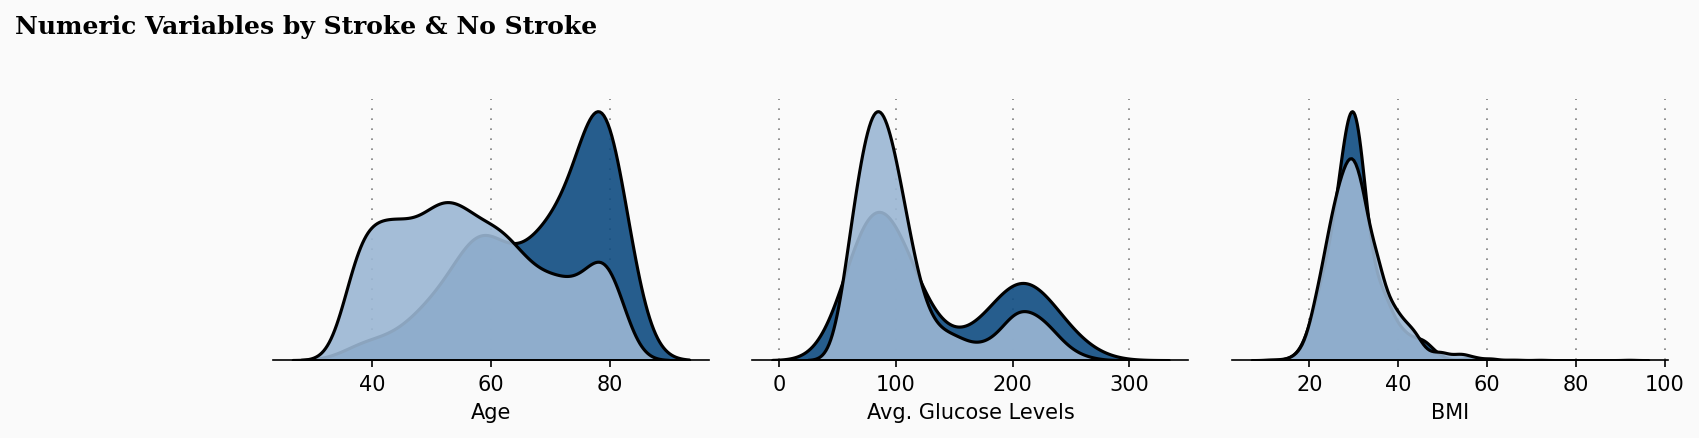

In [18]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df_raw[df_raw['stroke'] == 1]
ns = df_raw[df_raw['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
#ax3.set_xlabel('Gender')

        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=12, fontweight='bold', fontfamily='serif')

plt.show()

**Age looks to be a prominent factor** 

In [4]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=df_raw)
    plt.show()

def countplot_targetvsfeature(data, feature,y):
    fig = plt.figure(figsize=(10,5))
    plot=sns.countplot(x=feature,data=data,hue=y)
    plt.show()  

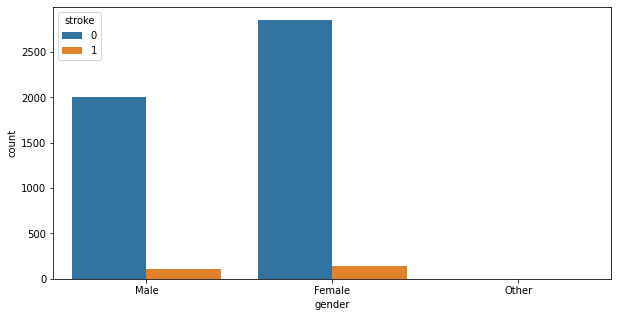

In [5]:
countplot_targetvsfeature(df_raw,'gender','stroke')

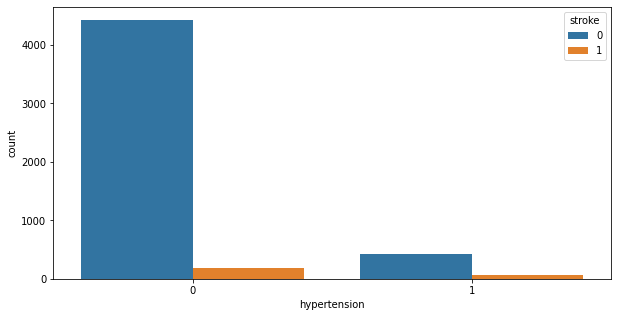

In [6]:
countplot_targetvsfeature(df_raw,'hypertension','stroke')


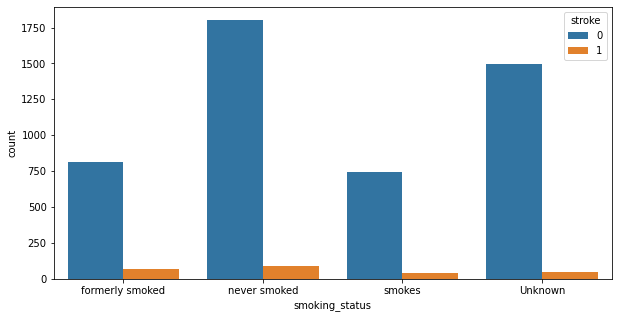

In [7]:
countplot_targetvsfeature(df_raw,'smoking_status','stroke')

In [ ]:
df_raw[(df_raw["stroke"]==1) & (df_raw["smoking_status"]=="Unknown")]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


## Plotting different features against one other

In [ ]:
matrix = df_raw.corr(columns=["age","avg_glucose_level","bmi"])
display(matrix)

TypeError: corr() got an unexpected keyword argument 'columns'

<AxesSubplot:>

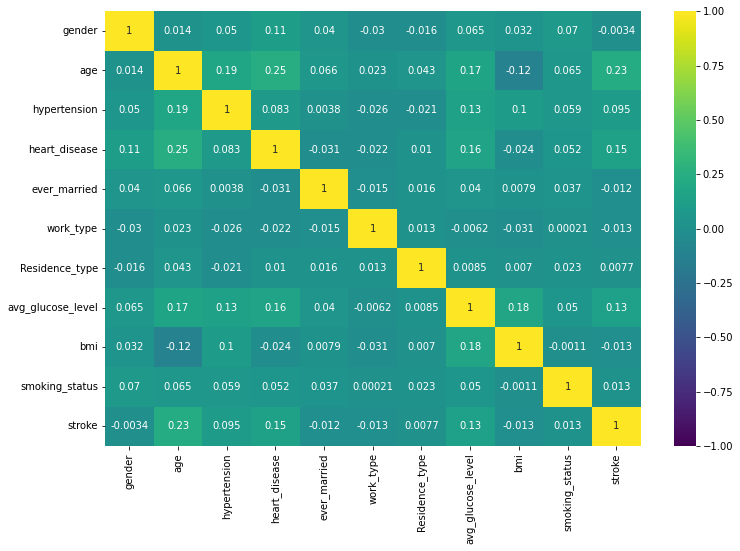

In [ ]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

Some feature depend of or are relative to the age. weak relation


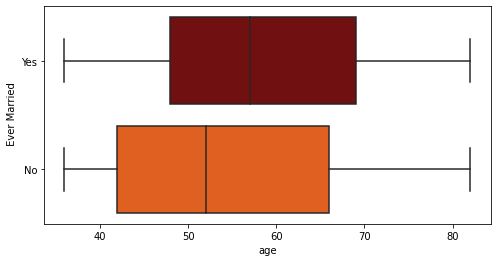

In [ ]:
#Checking correlation between Married and Age:
#The parameter showfliers = False is ignoring the outliers. But if we do not establish that parameter, we can use boxplots to view outliers.
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.ever_married, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Ever Married')
plt.yticks([0,1], ['Yes','No'])
plt.show()

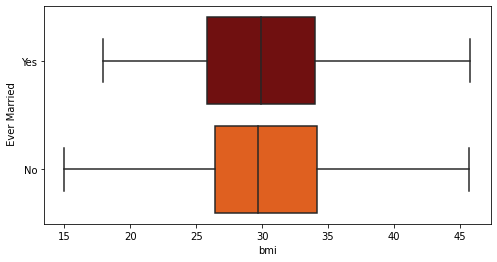

In [ ]:
#Checking correlation between Married and bmi:
#The parameter showfliers = False is ignoring the outliers. But if we do not establish that parameter, we can use boxplots to view outliers.
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.ever_married, x = df_raw.bmi, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Ever Married')
plt.yticks([0,1], ['Yes','No'])
plt.show()

the bmi increment in the bmi, but also incremente the age

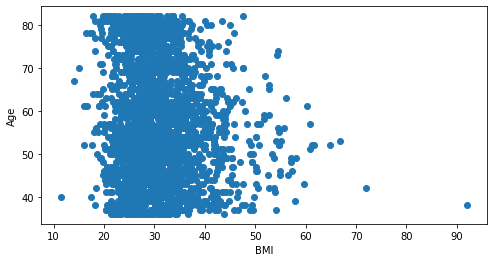

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(x=df_raw['bmi'], y=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

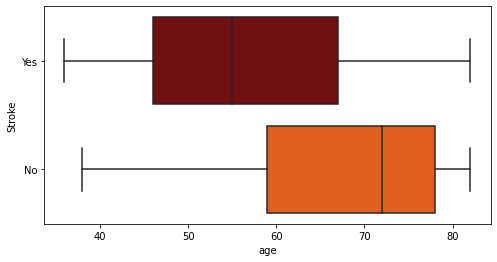

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

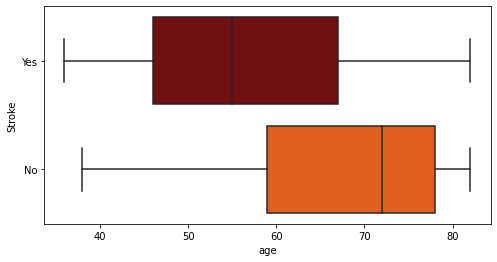

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

## OTLIERS

In [ ]:
df_raw[df_raw['bmi']>60].sort_values(by=['bmi'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
466,0,61,1,0,1,0,0,170.05,60.2,2,0
4838,0,51,0,0,1,0,1,107.72,60.9,0,0
270,0,57,1,0,1,0,0,129.54,60.9,2,0
2840,0,52,0,0,1,0,1,98.27,61.2,0,0
3825,0,52,0,0,1,0,0,118.46,61.6,2,0
358,1,52,0,0,1,1,1,78.40,64.8,1,0
1559,0,53,0,0,1,0,0,72.63,66.8,0,0
544,1,42,0,0,1,0,0,210.48,71.9,1,0
4209,1,38,1,0,1,0,0,56.90,92.0,1,0


i will remove the last two value 92 and 97 bmi ?


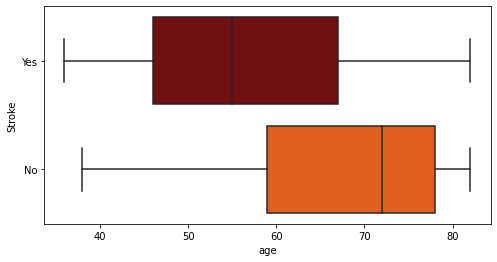

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_filter_age35.stroke, x = df_filter_age35.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

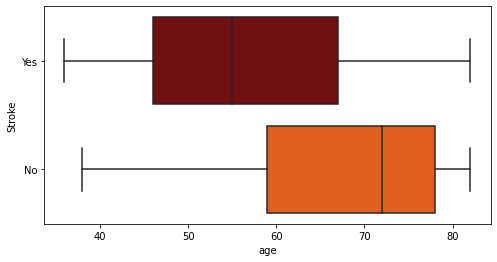

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

# PIPELINE

#  ATENCION bmi lo transformamos con los bin o con knn *

In [ ]:
def bmi_transformer_func (df):
    df['age_bins'] = pd.cut(df['age'], bins=[35, 45, 55, 65, np.inf], labels=['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'], right=False)
    df['bmi'] =df.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
    return df


In [ ]:
df_clean = bmi_transformer_func(df_raw)
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,65 - +
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.343135,never smoked,1,55 - 64.9
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,65 - +
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,45 - 54.9
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,65 - +
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.557083,never smoked,0,65 - +
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,65 - +
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,35 - 44.9
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,45 - 54.9


In [ ]:
preprocessor = ColumnTransformer( 
   transformers=[
       # Transformer name, Transformer Object and columns      
       ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] ),
       ("id_drop", "drop", ['id','age_bins'])
    ],
    # Any other columns are ignored
    remainder="passthrough"

)

In [ ]:
train_X = preprocessor.fit_transform(df_raw)
df_clean=pd.DataFrame(train_X)
df_clean

,0,1,2,3,4
0,1.0,1.0,2.0,1.0,1.0
1,0.0,1.0,3.0,2.0,0.0
2,0.0,1.0,2.0,2.0,1.0
3,1.0,1.0,2.0,3.0,0.0
4,0.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...
5105,1.0,1.0,2.0,2.0,0.0
5106,1.0,1.0,3.0,2.0,0.0
5107,0.0,1.0,3.0,2.0,0.0
5108,0.0,1.0,2.0,1.0,1.0


In [ ]:
pipe_clf = Pipeline([
  (
    "FeatureEngineering",
    ColumnTransformer( 
          transformers=[
              # Transformer name, Transformer Object and columns
              ("id_drop", "drop", ['id','age_bins']), 
              ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] )
            ],
            # Any other columns are ignored
            remainder="passthrough"

        ),
  )
])
pipe_clf.fit_transform(df_raw)

array([[  1.        ,   1.        ,   2.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,   1.        ,   3.        , ..., 202.21      ,
         31.34313454,   1.        ],
       [  0.        ,   1.        ,   2.        , ..., 105.92      ,
         32.5       ,   1.        ],
       ...,
       [  0.        ,   1.        ,   3.        , ...,  82.99      ,
         30.6       ,   0.        ],
       [  0.        ,   1.        ,   2.        , ..., 166.29      ,
         25.6       ,   0.        ],
       [  1.        ,   1.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

# PIPELINE

In [88]:
df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

#Remove data about person below 35 years-old
df_filter_age35 = df_raw[df_raw['age']>35]
df_raw = df_filter_age35.copy()

#Impute BMI value
labels = ['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'] 
# Define the edges between bins
bins = [35, 45, 55, 65, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
#set bmi using the mean of each range of age
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)

# Encoding the 'Residence_type' column
df_raw['Residence_type'] = df_raw['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df_raw['Residence_type'].astype(int)

# Encoding the 'Residence_type' column
df_raw['ever_married'] = df_raw['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df_raw['ever_married'].astype(int)
 
# Encoding the 'work type' column
df_raw['work_type'] = df_raw['work_type'].map({'Private' : 0, 'Self-employed': 1, 'children': 2 , 'Govt_job':3, 'Never_worked':4})
df_raw['work_type'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)

#Remove features
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)


In [89]:
scaler = MinMaxScaler()
train_scaler = scaler.fit(df_raw[['age','bmi','avg_glucose_level']])
df_raw[['age','bmi','avg_glucose_level']] = train_scaler.transform(df_raw[['age','bmi','avg_glucose_level']])


# MODELOS - PRUEBAS

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [7]:
df_guadar=df_raw.copy()

In [90]:
#definimos nuestras etiquetas y features
y = df_raw['stroke']
X = df_raw.drop('stroke', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [91]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
433,1,0.717391,0,0,1,1,0,0.786301,0.317224,1
2094,1,0.347826,0,0,1,3,0,0.240393,0.232962,0
3190,1,0.347826,0,0,1,0,1,0.237022,0.137546,1
4401,0,0.652174,0,0,1,1,0,0.142065,0.206939,0
1786,1,0.847826,0,0,1,1,1,0.149963,0.200743,3
...,...,...,...,...,...,...,...,...,...,...
1506,0,0.673913,0,1,1,1,0,0.187789,0.255266,0
599,1,0.500000,1,0,1,0,1,0.691114,0.241636,1
467,1,0.152174,1,0,0,1,0,0.748568,0.200743,1
165,0,0.913043,0,0,1,1,1,0.360105,0.152416,3


In [92]:
#definimos funciona para mostrar los resultados
LABELS1={"No Stroke","Stroke"}
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS1, yticklabels=LABELS1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=False))

## LOGISTIC REGRESSION

In [93]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#ejecutamos el modelo "tal cual"
model_logisticR = run_model(X_train, X_test, y_train, y_test)
 

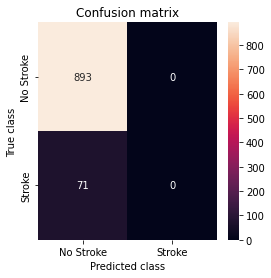

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       893
           1       0.00      0.00      0.00        71

    accuracy                           0.93       964
   macro avg       0.46      0.50      0.48       964
weighted avg       0.86      0.93      0.89       964



In [94]:
pred_y = model_logisticR.predict(X_test)
mostrar_resultados(y_test, pred_y)
#todos son clasificados como no stroke

## LOGISTIC REGRESSION BALANCED

In [142]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight={1:12,0:1})
    clf.fit(X_train, y_train)
    return clf
 
model_balanced = run_model_balanced(X_train, X_test, y_train, y_test) 

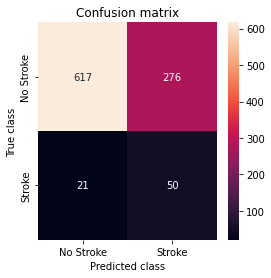

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       893
           1       0.15      0.70      0.25        71

    accuracy                           0.69       964
   macro avg       0.56      0.70      0.53       964
weighted avg       0.91      0.69      0.77       964



In [143]:
pred_y = model_balanced.predict(X_test)
mostrar_resultados(y_test, pred_y)

## NEARMISS

Distribution before resampling Counter({0: 2072, 1: 175})
Distribution after resampling Counter({0: 175, 1: 175})


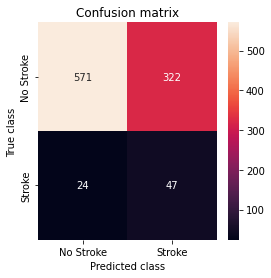

              precision    recall  f1-score   support

           0       0.96      0.64      0.77       893
           1       0.13      0.66      0.21        71

    accuracy                           0.64       964
   macro avg       0.54      0.65      0.49       964
weighted avg       0.90      0.64      0.73       964



In [97]:
us = NearMiss(n_neighbors=50, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y) 

## SAMPLING

Distribution before resampling Counter({0: 2072, 1: 175})
Distribution labels after resampling Counter({0: 2072, 1: 2072})


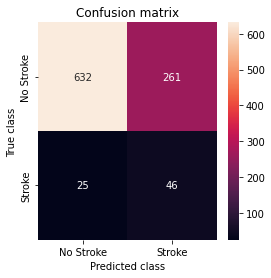

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       893
           1       0.15      0.65      0.24        71

    accuracy                           0.70       964
   macro avg       0.56      0.68      0.53       964
weighted avg       0.90      0.70      0.77       964



In [98]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
 

## BALANCED BAGGING WITH DESICIONTREE

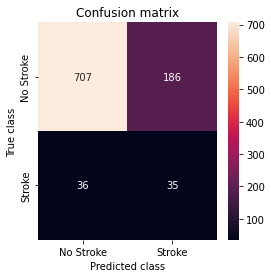

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       893
           1       0.16      0.49      0.24        71

    accuracy                           0.77       964
   macro avg       0.55      0.64      0.55       964
weighted avg       0.89      0.77      0.82       964



In [99]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(random_state=42,base_estimator=DecisionTreeClassifier(random_state=1,max_features='sqrt',class_weight="balanced"),n_estimators=2000)
bbc.fit(X_train,y_train) 

pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)


# DECISION TREE CLASSIFIER BASIC

In [100]:

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8589211618257261

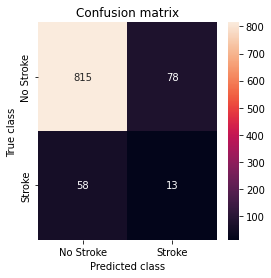

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       893
           1       0.14      0.18      0.16        71

    accuracy                           0.86       964
   macro avg       0.54      0.55      0.54       964
weighted avg       0.88      0.86      0.87       964



In [101]:
mostrar_resultados(y_test, y_pred)

# DESICION TREE CLASSIFIER BALANCED

In [102]:
# Create the tree
tree_balance = DecisionTreeClassifier(max_depth=8, class_weight='balanced')
tree_balance.fit(X_train,y_train) 

#create array of probabilities
y_test_predict_proba = tree_balance.predict_proba(X_test)
y_test_predict_proba

y_pred = tree_balance.predict(X_test)
accuracy_score(y_test, y_pred)

tree_balance.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [103]:
# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_balance.feature_importances_):
    print(name + ': ' + str(importance))

age: 0.00816197678541551
hypertension: 0.37123540445282244
heart_disease: 0.006680019149802974
ever_married: 0.04470456304299284
work_type: 0.014099972764812212
Residence_type: 0.019919013074103875
avg_glucose_level: 0.016509338790855334
bmi: 0.21254174915004265
smoking_status: 0.24504711301208335
stroke: 0.06110084977706879


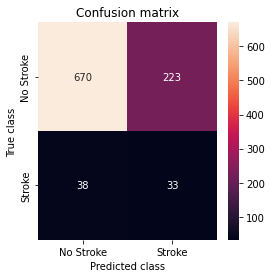

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       893
           1       0.13      0.46      0.20        71

    accuracy                           0.73       964
   macro avg       0.54      0.61      0.52       964
weighted avg       0.89      0.73      0.79       964



In [104]:
mostrar_resultados(y_test, y_pred)

## RANDOMFOREST CLASSIFIER

In [105]:
# Fit a Random Forest model

clf = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9253112033195021

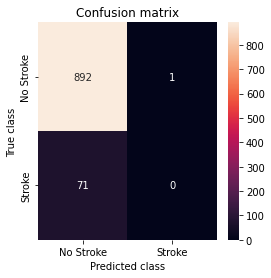

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       893
           1       0.00      0.00      0.00        71

    accuracy                           0.93       964
   macro avg       0.46      0.50      0.48       964
weighted avg       0.86      0.93      0.89       964



In [106]:
mostrar_resultados(y_test, y_pred)
 

## GRADIENT BOOSTING

In [107]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9190871369294605

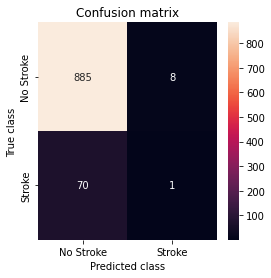

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       893
           1       0.11      0.01      0.03        71

    accuracy                           0.92       964
   macro avg       0.52      0.50      0.49       964
weighted avg       0.87      0.92      0.89       964



In [108]:
mostrar_resultados(y_test, y_pred)

# Using GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV

In [129]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [8,10,20,30]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[5,20,30,40],
                      min_samples_leaf=[5,10,20,40])

In [130]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=41,class_weight={1:15,0:1}), parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 15},
                                              random_state=41),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 20, 30],
                         'max_features': range(1, 11),
                         'min_samples_leaf': [5, 10, 20, 40],
                         'min_samples_split': [5, 20, 30, 40]})

In [126]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: entropy
Best max_depth: 20
Best min_samples_split: 5
Best min_samples_leaf: 5
Best Number Of Components: 6


{'ccp_alpha': 0.0,
 'class_weight': {1: 20, 0: 1},
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 41,
 'splitter': 'best'}

In [127]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=6,                                             
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_depth = 20,
                                    random_state=0,
                                    class_weight={1:20,0:1})
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))

Score:0.766597510373444
age: 0.020273893372177998
hypertension: 0.306634574122233
heart_disease: 0.020149660446953856
ever_married: 0.039532357167848066
work_type: 0.024506329085631346
Residence_type: 0.04152822037225535
avg_glucose_level: 0.03169489651578604
bmi: 0.2083770466853003
smoking_status: 0.247209532488027
stroke: 0.060093489743787025


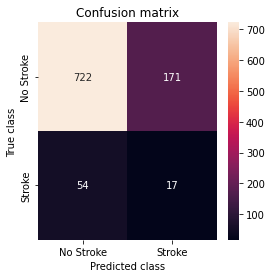

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       893
           1       0.09      0.24      0.13        71

    accuracy                           0.77       964
   macro avg       0.51      0.52      0.50       964
weighted avg       0.87      0.77      0.81       964



In [128]:
y_pred = tree_model.predict(X_test)
mostrar_resultados(y_test, y_pred)